In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.display import Image

# Les données : Digit-Recognizer de Kaggle 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [3]:
X_train = np.load('../data/digit-recognizer/X_train.npy')
X_test = np.load('../data/digit-recognizer/X_test.npy')

y_train = np.load('../data/digit-recognizer/y_train.npy')
y_test = np.load('../data/digit-recognizer/y_test.npy')

In [4]:
print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (33600, 784)
X_test shape : (8400, 784)
y_train shape : (33600,)
y_test shape : (8400,)


# Résaux de neurones profonds - DNN

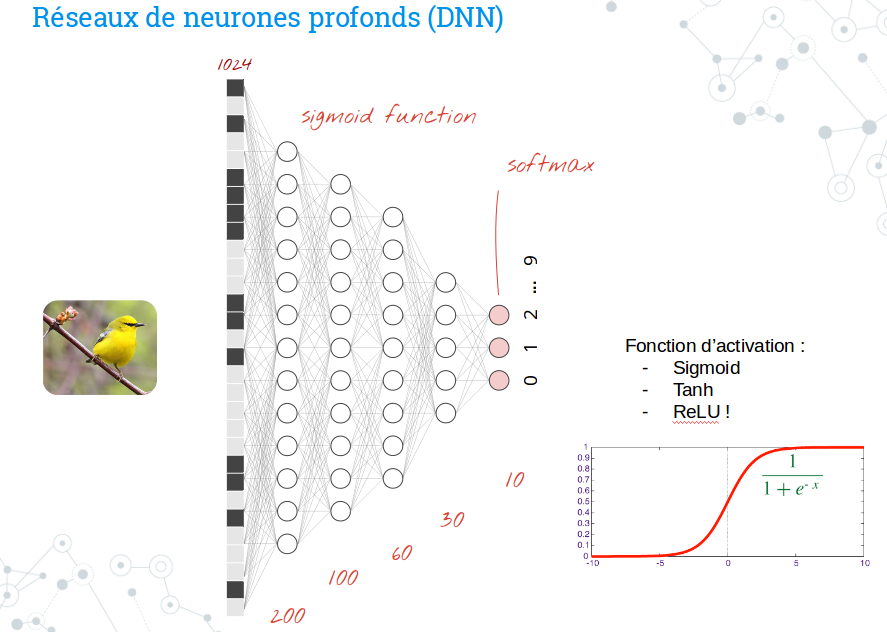

In [5]:
Image(filename='../ressources/DNN.png') 

- modèle profond : plusieurs non-linéarités
- données déjà préparées : liste de vecteurs de dimension 1024 (image noir et blanc) 
- découpage train/test déjà fait ! (voir script de préparation)

### La caisse à outils : 

In [6]:
# Point de départ
from keras.models import Sequential

# Couches nécessaires
from keras.layers import Dense, Activation

# Régularisation ? 
from keras.regularizers import l2

# Algorithme d'optimisation 
from keras.optimizers import SGD

# Pour le one-hot encoding
from keras.utils.np_utils import to_categorical

# Callbacks de Keras : outils avancés de gestion ou de contrôle ! 
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


# Construire le modèle 

In [7]:
model = Sequential()

# 4 Couches cachées 
model.add(Dense(150,input_shape=(784,), activation='sigmoid', W_regularizer=l2(0.001)))
model.add(Dense(100, activation='sigmoid', W_regularizer=l2(0.001)))

model.add(Dense(10, activation='softmax', W_regularizer=l2(0.001)))

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 150)           117750      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 100)           15100       dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            1010        dense_2[0][0]                    
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
____________________________________________________________________________________________________


# Compiler le modèle

In [9]:
sgd = SGD(lr=0.01)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks avec Keras 

Ce sont des fonctions de monitoring !

- faire de sauvegardes régulières des paramètres
- ajuster le learning rate
- stopper l'entraînement pour éviter l'overfitting

- faire ses propres callbacks : pour envoyer données vers un téléphone portable et contrôler l'entraînement à distance ! 



In [10]:
!ls

DIGIT-RECOGNIZER-submission.csv  DNN-CORRECTION.ipynb  DNN.ipynb  checkpoints


In [11]:
checkpoint = ModelCheckpoint('checkpoints/weights.{epoch:02d}-{val_loss:.4f}.hdf5', verbose=0,
                             save_best_only=True,
                             save_weights_only=True,
                             period=1)

In [12]:
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0)

In [13]:
batch_size = 32
nb_epoch = 5

history = model.fit(X_train,to_categorical(y_train, nb_classes=10),
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=1,
                    validation_data = (X_test,to_categorical(y_test,nb_classes=10)),
                    callbacks=[earlyStop, checkpoint])

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 9s - loss: 2.4294 - acc: 0.5113 - val_loss: 2.0952 - val_acc: 0.7162

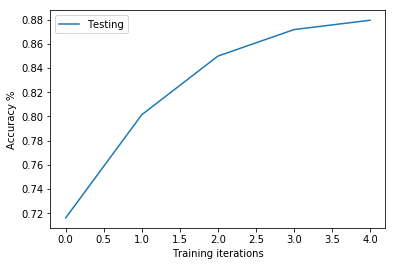

In [14]:
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations')
plt.legend(['Testing'], loc='upper left')
plt.show()

## Appliquer le modèle à de nouvelles données 

In [15]:
test_data = np.load('../data/digit-recognizer/test_data.npy')
print(test_data.shape)

(28000, 784)


In [16]:
predictions = model.predict_classes(test_data,batch_size=128,verbose=1)

27776/28000 [============================>.] - ETA: 0s

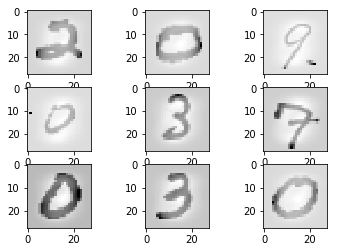

[2 0 4 4 2 7 0 3 0]


In [17]:
# Afficher quelques exemples 
for i in range(9):
    plt.subplot(331+i)
    #Les images sont sous forme de vecteurs, de taille 784=28x28
    plt.imshow(test_data[i].reshape(28,28), cmap=cm.binary)
plt.show()
print(predictions[:9])

In [18]:
# A faire chez soi : envoyerrésultats sur Kaggle
import pandas as pd

pd.DataFrame({"ImageId": list(range(1,len(test_data)+1)), 
              "Label": predictions}).to_csv('DIGIT-RECOGNIZER-submission.csv', index=False,header=True)